# 1 Author

Dandi Yu



# 2 Problem formulation

I am trying to build a Machine Learning model to take an input of a Potter or StarWars audio segment of humming or whistling and predicts its song label (either Harry or StarWars).

# 3 Machine Learning pipeline

My machine learning pipeline involves these several parts: its input, its transformation stage, actual machine learning models used, and finally its output.
- Input: I have used 50 recordings of Potter and 50 recordings StarWars from Part1 folders as the input for training and validating of the model purpose.

- Transformation stages: since what we are dealing here is audio recordings, unfortunately the features and labels for the ML modelling are not very straightforward. Therefore a series of data pre-processing steps are involved to get the features and lables of training data for the later modelling. 

  1)The audio segments of Potter Part1 and StarWars Part1 are stored online and in zip file, I have downloaded them to Google drive. 
  
  2) Unzip them to specified directory. 
  
  3) I have printed file paths and realized that some of the recordings are wrongly named which is affecting extracting the correct lables of my training and validating data later on, thus I have applied some rules to rename them into the right format. 
  
  4) I used the function getXy() to extract four features 'power','pitch_mean', 'pitch_std' and 'voiced_fr' of each recording and the corresponding labels of the data. 
  
  5) The top five outliers have been removed based on Mahalanobis distance. 
  
  6) Split the data into a ratio of 7:3 for training and validating purposes. 

- Modelling: I have used KNN with k=3 as my model method with 5-fold cross validation to train and validate the model in order to get a more general training result.

- Output: the final output of the model is to predict if a recording is from Potter or StarWars. If the label predicted is 1 it means it's from Potter, if the label predicted is 0 then it means it's from StarWars.



# 4 Transformation stage

Transformations are described in detail in previous section 'Machine Learning pipeline'.

# 5 Modelling

The final model to use is KNN with k=3.



# 6 Methodology

After preprocessing the data, I have visualised the features on the scatter plots, I see that the data is not easy to be seen as two clear classifications. So I have been carried out various ML models to explore which one is the best to use. And the model performanced is assessed based on it's accuracy and f1-score. I trained the model with train data and test them with validate data. After trying with the following models, I will decide the best model to use. After that, I will use the final test data to test the model.

1. KNN
2. SVM
3. Logistic Regression (and with polynomial features)
4. Naive Bayes Classifier
5. Random Forest Tree



# 7 Dataset

As mentioned in section 3 ML pipeline, the data involved is devided into three parts, training data to train the model, validating data to tune the model and testing data to show the final result of the model.
- Experiment data: Train data and validate data is four features extracted from 50 recordings of Potter and StarWars, and splitting them into a ratio of 7:3 to use as training and validating purpose. 
- Test data is the four features extracted from another 50 recordings of Potter and 50 recordings of StarWars.

After extracting features for the experiment data, I have produced various 2-D and 3D scatter plots to view them. And I also applied PCA to reduce to two PCs to visualize the data. Then I see there seems to have some outliers which are quite far away from the majority of the data. So I have applied Mahalanobis distance to exclude the top five items according to their outlier scores.  

And I have also excluded the top five items in the final test dataset according to their outlier scores by using Mahalanobis distance again.


# 8 Results

Carry out your experiments here, explain your results.

As mentioned in the methodology, I have tried with the following models. The results are as following:
1. KNN: experiment with k=1-10. I find that when k=3 both the accuracy of training and testing, and also f1-score for two classes are the best.
The training accuracy is  0.85
The validation accuracy is 0.69.
f1-score for class 0 and 1: [0.67, 0.71]


2. SMV: 
The training accuracy is  0.59
The validation accuracy is 0.55
f1-score for class 0 and 1: [0.60606061, 0.48]

3. Logistic Regression
Training accuracy of the logistic classifier: 0.6060606060606061
Validation accuracy of the logistic classifier: 0.4482758620689655
f1-score for class 0 and 1: array([0.46666667, 0.42857143]) 

   I also considered due to the visualization of the features may follow a more complex formula, I then applied polynomial features with a degree of 3 and then applied logistic regression again. Results are:
Training accuracy of the logistic classifier: 0.7727272727272727
Validation accuracy of the logistic classifier: 0.5862068965517241
f1-score for class 0 and 1: [0.53846154, 0.625]

   I see slight improvement in the result but not the best one though.

4. Naive Bayes Classifier
Training accuracy : 0.7272727272727273
Validation accuracy : 0.6206896551724138
f1-score for class 0 and 1: [0.56 , 0.66666667]

5. Random Forest Tree
Training accuracy: 1
Test dataset accuracy (random forest classifier): 0.6206896551724138.
f1-score for class 0 and 1: [0.62068966, 0.62068966]

For all the models, I also tried with z-score normalised data, but the performance is not as good as the original one, so I didn't use them in the end.

Among all these methods, I see KNN with k=3 returns the best result in both training and testing. Then I used cross validation 5-fold to test again the model. And the training accuracy is about 0.69. Therefore I decided to pick this as my final model.

In the end, I used this model to test on my final test data of 100 recordings. The test accuracy is 0.51. 


# 9 Conclusions

The model seems to return a not very good result with an accuracy of 0.51 on the final test data. And by looking through the confusion matrix, the performance for predicting Starwars (Class 0) is not very good, only 20 out of 48 recordings are predicted correctly. And the performance for predicting Potter (Class 1) is not good as well, only 28 out of 47 are predicted correctly. 

I see that the training data accuracy is quite high over 0.8, while the final test accuracy is considerably low. Maybe more data should be included for training the model in order to make the model more general.

In addition, I have tried many models, and I believe this is the best model I can find on given feature data. Maybe new features should be explored in the future.

#Environment set up

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd

from tqdm import tqdm
import librosa

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Data Download

In [ ]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [ ]:
#download zip file for Potter Part 1
url_Potter1 = "https://collect.qmul.ac.uk/down?t=6122TDAA73VPCMDQ/5DSHD27BLQMK5S8E1HLG19O"
save_path_Potter1 = '/content/drive/MyDrive/Data/MLEndHW/Potter_Part1.zip'
download_url(url_Potter1, save_path_Potter1)

In [ ]:
#download zip file for StartWars Part 1
url_StarWars1 = "https://collect.qmul.ac.uk/down?t=650T7K3FAE26MB29/592IN2FALUM43SGC35O0580"
save_path_StarWars1 = '/content/drive/MyDrive/Data/MLEndHW/StarWars1.zip'
download_url(url_StarWars1, save_path_StarWars1)

In [ ]:
#check the zip files are downloaded in the specified folder
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['MLEndHW_Sample.zip',
 'sample',
 'Potter_Part1.zip',
 'StarWars1.zip',
 'StarWars',
 'Frozen1.zip',
 'potter_official.wav',
 'Frozen',
 'Potter']

#Unzip the files and regularize the file names

In [ ]:
#StarWars part1 unzip
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

StarWars1_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/*'
StarWars1_files = glob.glob(StarWars1_path)
len(StarWars1_files)

210

In [ ]:
#Potter part1 unzip
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/Potter_Part1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

Potter1_path = '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/*'
Potter1_files = glob.glob(Potter1_path)
len(Potter1_files)

210

In [ ]:
#StarWars1 file name before rename
StarWars1_files

['/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S1_hum_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S1_whistle_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S2_hum_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S2_whistle_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S3_hum_3_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S3_hum_4_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S4_hum_3_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S4_hum_4_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S5_hum_3_Starwars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S5_hum_4_Starwars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S6_whisle_1_starwar.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWa

In [ ]:
#rename rules for StarWars Part1 files
for StarWars1_file in StarWars1_files:
    file_name_new = StarWars1_file.replace('S6_whisle_1_starwar', 'S6_whistle_1_StarWars')
    file_name_new = file_name_new.replace('S6_whisle_2_starwar', 'S6_whistle_2_StarWars')
    file_name_new = file_name_new.replace('S42_Hum2_StarWar', 'S42_hum_2_StarWars')
    file_name_new = file_name_new.replace('S42_Hum3.StarWar', 'S42_hum_3_StarWars') 
    file_name_new = file_name_new.replace('S55_starwars_hum_1', 'S55_hum_1_StarWars')
    file_name_new = file_name_new.replace('S55_starwars_whistle_2', 'S55_whistle_2_StarWars')
    file_name_new = file_name_new.replace('S95_Whistle 1 StarWars', 'S95_whistle_1_StarWars')
    file_name_new = file_name_new.replace('[', '')
    file_name_new = file_name_new.replace(']', '')
    file_name_new = file_name_new.replace(' ', '')
    file_name_new = file_name_new.replace('Hum', 'hum')
    file_name_new = file_name_new.replace('Whistle', 'whistle')
    file_name_new = file_name_new.replace('WAV', 'wav')
    file_name_new = file_name_new.replace('StatWars','StarWars')
    file_name_new = file_name_new.replace('StarsWars','StarWars')
    file_name_new = file_name_new.replace('starwars', 'StarWars')
    file_name_new = file_name_new.replace('Starwars', 'StarWars')
    file_name_new = file_name_new.replace('whisle', 'whistle')
    file_name_new = file_name_new.replace('hum1', 'hum_1_')
    file_name_new = file_name_new.replace('whistle1.wav', 'whistle_1_.wav')
    os.rename(StarWars1_file, file_name_new)


In [ ]:
#check the names after regularization
StarWars1_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/*'
StarWars1_files = glob.glob(StarWars1_path)
len(StarWars1_files)

210

In [ ]:
StarWars1_files

['/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S1_hum_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S1_whistle_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S2_hum_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S2_whistle_2_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S3_hum_3_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S3_hum_4_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S4_hum_3_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S4_hum_4_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S5_hum_3_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S5_hum_4_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S6_whistle_1_StarWars.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Star

In [ ]:
#Potter1 file name before rename
Potter1_files

['/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S1_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S1_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S2_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S2_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S3_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S3_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S4_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S4_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S5_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S5_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S6_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S6_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Dat

In [ ]:
#rename rules for files in Potter Part 1
for Potter1_file in Potter1_files:
    file_name_new = Potter1_file.replace('S55_harrypotter_hum_2','S55_hum_2_Potter')
    file_name_new = file_name_new.replace('S55_harrypotter_whistle_1','S55_whistle_1_Potter')
    file_name_new = file_name_new.replace('S95_Hum 2 Potter','S95_hum_2_Potter')
    file_name_new = file_name_new.replace('S95_Whistle 2 Potter','S95_whistle_2_Potter')
    file_name_new = file_name_new.replace('harry potter','Potter')
    file_name_new = file_name_new.replace('S38_hum_3_Potterwav.wav','S38_hum_3_Potter.wav')
    file_name_new = file_name_new.replace('[', '')
    file_name_new = file_name_new.replace(']', '')
    file_name_new = file_name_new.replace(' ', '')
    file_name_new = file_name_new.replace('Wav','wav')
    file_name_new = file_name_new.replace('wav .wav','.wav')
    file_name_new = file_name_new.replace('wav.wav','wav')
    file_name_new = file_name_new.replace('potter','Potter')
    file_name_new = file_name_new.replace('Hum', 'hum')
    file_name_new = file_name_new.replace('Whistle', 'whistle')
    file_name_new = file_name_new.replace('hum2', 'hum_2')
    file_name_new = file_name_new.replace('hum3', 'hum_3')
    file_name_new = file_name_new.replace('whistle2', 'whistle_2_')
    file_name_new = file_name_new.replace('whistle1.wav', 'whistle_1_.wav')
    os.rename(Potter1_file, file_name_new)

In [ ]:
#check the names after regularization
Potter1_path = '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/*'
Potter1_files = glob.glob(Potter1_path)
len(Potter1_files)

210

In [ ]:
Potter1_files


['/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S1_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S1_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S2_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S2_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S3_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S3_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S4_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S4_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S5_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S5_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S6_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S6_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Dat

#Creat a dataframe to contain all the information for the files

In [ ]:
#let files combine the paths for Potter1 and StarWars1 
files = Potter1_files
files.extend(StarWars1_files)
len(files)

420

In [ ]:
MLENDHW_table = [] 

for file in files:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  #display(file)
  interpretation_number = file.split('/')[-1].split('_')[2]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_table


[['S1_hum_2_Potter.wav', 'S1', 'hum', '2', 'Potter'],
 ['S1_whistle_2_Potter.wav', 'S1', 'whistle', '2', 'Potter'],
 ['S2_hum_2_Potter.wav', 'S2', 'hum', '2', 'Potter'],
 ['S2_whistle_2_Potter.wav', 'S2', 'whistle', '2', 'Potter'],
 ['S3_hum_1_Potter.wav', 'S3', 'hum', '1', 'Potter'],
 ['S3_hum_2_Potter.wav', 'S3', 'hum', '2', 'Potter'],
 ['S4_hum_1_Potter.wav', 'S4', 'hum', '1', 'Potter'],
 ['S4_hum_2_Potter.wav', 'S4', 'hum', '2', 'Potter'],
 ['S5_hum_1_Potter.wav', 'S5', 'hum', '1', 'Potter'],
 ['S5_hum_2_Potter.wav', 'S5', 'hum', '2', 'Potter'],
 ['S6_hum_2_Potter.wav', 'S6', 'hum', '2', 'Potter'],
 ['S6_whistle_2_Potter.wav', 'S6', 'whistle', '2', 'Potter'],
 ['S7_hum_1_Potter.wav', 'S7', 'hum', '1', 'Potter'],
 ['S7_hum_2_Potter.wav', 'S7', 'hum', '2', 'Potter'],
 ['S9_hum_1_Potter.wav', 'S9', 'hum', '1', 'Potter'],
 ['S9_hum_2_Potter.wav', 'S9', 'hum', '2', 'Potter'],
 ['S13_hum_1_Potter.wav', 'S13', 'hum', '1', 'Potter'],
 ['S13_hum_2_Potter.wav', 'S13', 'hum', '2', 'Potter'],


In [ ]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S1_hum_2_Potter.wav,S1,hum,2,Potter
S1_whistle_2_Potter.wav,S1,whistle,2,Potter
S2_hum_2_Potter.wav,S2,hum,2,Potter
S2_whistle_2_Potter.wav,S2,whistle,2,Potter
S3_hum_1_Potter.wav,S3,hum,1,Potter
...,...,...,...,...
S107_whistle_2_StarWars.wav,S107,whistle,2,StarWars
S109_hum_3_StarWars.wav,S109,hum,3,StarWars
S109_hum_4_StarWars.wav,S109,hum,4,StarWars


In [ ]:
#export to csv to check the format of names
MLENDHW_df.to_csv('data_df.csv')

#Feature extraction

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  #print('f0',f0)
  #print('voice_flg',voiced_flag)
  #print('voiced_probs',voiced_probs)
  return f0,voiced_flag

In [ ]:
df_exp_P = MLENDHW_df[0:50] #experiment data df from Potter
df_exp_S = MLENDHW_df[210:260] #experiment data df from StarWars
df_test_P = MLENDHW_df[150:200] #final test data df from Potter
df_test_S = MLENDHW_df[350:400] #final test data df from StarWars

In [ ]:
#a dataframe containing the 100 experiment data from Potter and StarWars 
df_exp = df_exp_P.append(df_exp_S)
df_exp.tail()

,participant,interpretation,number,song
file_id,,,,
S31_hum_3_StarWars.wav,S31,hum,3,StarWars
S31_hum_4_StarWars.wav,S31,hum,4,StarWars
S32_hum_2_StarWars.wav,S32,hum,2,StarWars
S32_whistle_2_StarWars.wav,S32,whistle,2,StarWars
S34_hum_2_StarWars.wav,S34,hum,2,StarWars


In [ ]:
#a dataframe containing the 100 test data from Potter and StarWars
df_test = df_test_P.append(df_test_S)
df_test.head()

,participant,interpretation,number,song
file_id,,,,
S108_whistle_2_Potter.wav,S108,whistle,2,Potter
S110_hum_1_Potter.wav,S110,hum,1,Potter
S110_hum_2_Potter.wav,S110,hum,2,Potter
S111_hum_1_Potter.wav,S111,hum,1,Potter
S111_hum_2_Potter.wav,S111,hum,2,Potter


In [ ]:
#contain experiment data paths from Potter and StarWars
files_exp_P = files[0:50]
files_exp_S = files[210:260]
files_exp_P.extend(files_exp_S)
files_exp = files_exp_P
files_exp[0:5]

['/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S1_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S1_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S2_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S2_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S3_hum_1_Potter.wav']

In [ ]:
files_exp[95]

'/content/drive/MyDrive/Data/MLEndHW/StarWars/StarWars_Part1/S31_hum_3_StarWars.wav'

In [ ]:
#contain test data paths from Potter and StarWars
files_test_P = files[150:200]
files_test_S = files[350:400]
files_test_P.extend(files_test_S)
files_test = files_test_P
files_test[0:5]

['/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S108_whistle_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S110_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S110_hum_2_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S111_hum_1_Potter.wav',
 '/content/drive/MyDrive/Data/MLEndHW/Potter/Potter_Part1/S111_hum_2_Potter.wav']

In [ ]:
#Potter (y=1), Starwars (y=0)
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    #print(file_name)
    #print(labels_file.loc[fileID]['interpretation'])
    #print(labels_file.loc[fileID]['interpretation']=='hum')
    #yi = list(labels_file.loc[fileID]['interpretation'])[0]=='hum'
    yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    #xi = [pitch_mean,pitch_std]
    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [ ]:
#feature extraction for the experiment data with getXy() function to fetch 4 features [power,pitch_mean,pitch_std,voiced_fr]
X,y = getXy(files_exp, labels_file=df_exp, scale_audio=True, onlySingleDigit=True)

100%|██████████| 100/100 [06:20<00:00,  3.80s/it]


In [ ]:
#feature extraction for the final test data
X_test,y_test = getXy(files_test, labels_file=df_test, scale_audio=True, onlySingleDigit=True)

100%|██████████| 100/100 [06:04<00:00,  3.65s/it]


In [ ]:
# check the shape of experiment data X and y for four features
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (100, 4)
The shape of y is (100,)
The labels vector is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [ ]:
# check the shape of test data
print('The shape of X_test is', X_test.shape) 
print('The shape of y_test is', y_test.shape)
print('The labels vector is', y_test)

The shape of X_test is (100, 4)
The shape of y_test is (100,)
The labels vector is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [ ]:
#check the distribution of each song for the experiment data
print(' The number of Potter recordings is ', np.count_nonzero(y))
print(' The number of StarWars recordings is ', y.size - np.count_nonzero(y))

 The number of Potter recordings is  50
 The number of StarWars recordings is  50


In [ ]:
#check the distribution of each song for the test data
print(' The number of Potter recordings is ', np.count_nonzero(y_test))
print(' The number of StarWars recordings is ', y_test.size - np.count_nonzero(y_test))

 The number of Potter recordings is  50
 The number of StarWars recordings is  50


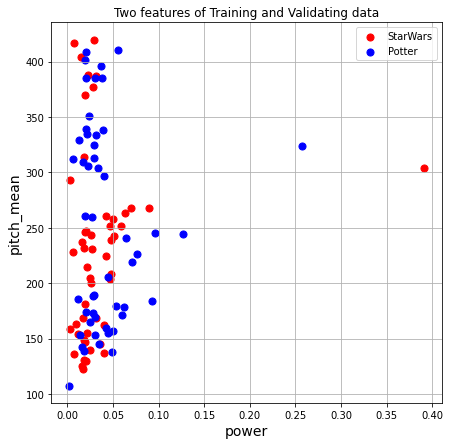

In [ ]:
#vasualize the first two features for experiment data
X_new = X[:,0:2]


import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_new[y==0,0], X_new[y==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_new[y==1,0], X_new[y==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training and Validating data")
plt.xlabel('power', fontsize=14)
plt.ylabel('pitch_mean', fontsize=14)
plt.grid(True)
plt.show()

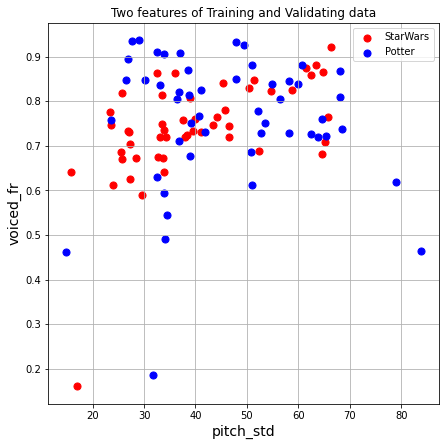

In [ ]:
#visualize the last two features for experiment data
X_new = X[:,2:4]

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_new[y==0,0], X_new[y==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_new[y==1,0], X_new[y==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training and Validating data")
plt.xlabel('pitch_std', fontsize=14)
plt.ylabel('voiced_fr', fontsize=14)
plt.grid(True)
plt.show()

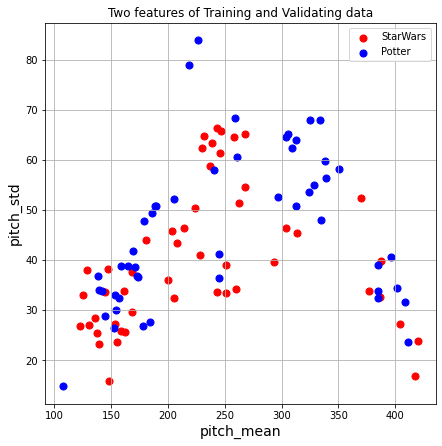

In [ ]:
#vasualize the second and the third two features for experiment data
X_new = X[:,1:3]


import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_new[y==0,0], X_new[y==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_new[y==1,0], X_new[y==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training and Validating data")
plt.xlabel('pitch_mean', fontsize=14)
plt.ylabel('pitch_std', fontsize=14)
plt.grid(True)
plt.show()

Text(0.5, 0.92, 'Training and Validating data (voice_fr is shown as the size of the data points)')

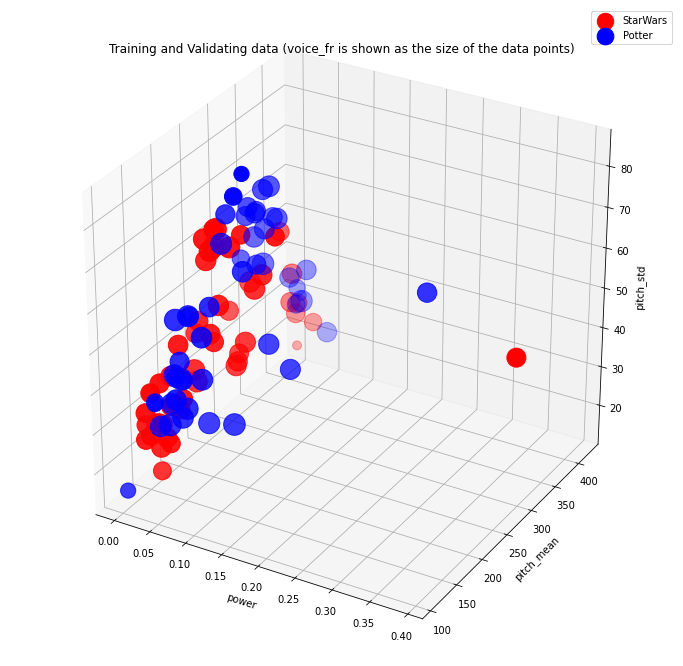

In [ ]:
#visualize the four features - first three in a 3d scatter plot and the last feature is displayed as the size of the points
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d') # initialise 3D plot

ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], c = 'red',s=X[y==0,3]*500)
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], c = 'blue',s=X[y==1,3]*500)
ax.set_xlabel('power')
ax.set_ylabel('pitch_mean')
ax.set_zlabel('pitch_std')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Training and Validating data (voice_fr is shown as the size of the data points)")
#ax.set_xlim(-2,2)
#ax.set_zlim(-2,1)

outlier

In [ ]:
#put X features in a dataframe
X_exp_table = [] 

for i in range(100):
  #fileID = df_exp.iloc[i,0]
  #songclass = df_exp.iloc[i,3]
  power = X[i,0]
  pitch_mean=X[i,1]
  pitch_std = X[i,2]
  voiced_fr = X[i,3]
  X_exp_table.append([power,pitch_mean,pitch_std, voiced_fr])
  

X_exp_table[0:5]
X_exp_df = pd.DataFrame(X_exp_table,columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr']) 
X_exp_df.head()

,power,pitch_mean,pitch_std,voiced_fr
0,0.001961,107.628769,14.832539,0.461431
1,0.020419,408.684951,31.757141,0.185645
2,0.053579,179.379037,47.894724,0.850131
3,0.037227,396.012292,40.644200,0.766846
4,0.093276,184.280074,27.611400,0.935164


In [ ]:
from numpy.linalg import inv

def mahalanobis(x=None, data=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    """
    x_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.matmul(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

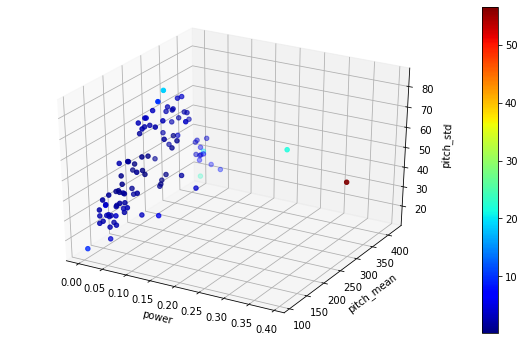

In [ ]:
# Compute Mahalanobis distance for delta dataset
mahal = mahalanobis(x=X_exp_df, data=X_exp_df[['power', 'pitch_mean', 'pitch_std', 'voiced_fr']])

# Assign an outlier score for the data based on the computed Mahalanobis distance
outlier_score = mahal

# Display 3D scatterplot with datapoints having a different color according to their outlier score
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_exp_df.power,X_exp_df.pitch_mean,X_exp_df.pitch_std,c=outlier_score,cmap='jet')
ax.set_xlabel('power')
ax.set_ylabel('pitch_mean')
ax.set_zlabel('pitch_std')
#ax.set_zlim(-2,50)
fig.colorbar(p)
plt.show()

In [ ]:
outlier = pd.DataFrame(outlier_score, index=X_exp_df.index, columns=['Outlier score'])
result = pd.concat((X_exp_df,outlier), axis=1)
result.nlargest(5,'Outlier score')

,power,pitch_mean,pitch_std,voiced_fr,Outlier score
84,0.391035,304.293906,46.477355,0.721010,56.590058
51,0.007037,416.913021,16.941491,0.160384,23.345639
34,0.257340,324.063015,53.563403,0.752447,21.704119
1,0.020419,408.684951,31.757141,0.185645,19.978174
32,0.076318,226.694188,83.838133,0.463106,18.935746


In [ ]:
#check the top 5 outliers
display(X[84])
display(X[51])
display(X[34])
display(X[32])
display(X[1])

array([  0.39103484, 304.29390629,  46.47735456,   0.72100955])

array([7.03651498e-03, 4.16913021e+02, 1.69414910e+01, 1.60384331e-01])

array([2.57339727e-01, 3.24063015e+02, 5.35634034e+01, 7.52446747e-01])

array([7.63179383e-02, 2.26694188e+02, 8.38381334e+01, 4.63106114e-01])

array([2.04190955e-02, 4.08684951e+02, 3.17571406e+01, 1.85645273e-01])

In [ ]:
#remove these two outliers
X_o = np.delete(X, 84, 0)
y_o = np.delete(y, 84, 0)


In [ ]:
display(X_o[51])

array([7.03651498e-03, 4.16913021e+02, 1.69414910e+01, 1.60384331e-01])

In [ ]:
X_o = np.delete(X_o, 51, 0)
y_o = np.delete(y_o, 51, 0)

In [ ]:
display(X_o[34])

array([2.57339727e-01, 3.24063015e+02, 5.35634034e+01, 7.52446747e-01])

In [ ]:
remove these three outliers
X_o = np.delete(X_o, 34, 0)
y_o = np.delete(y_o, 34, 0)
X_o = np.delete(X_o, 32, 0)
y_o = np.delete(y_o, 32, 0)
X_o = np.delete(X_o, 1, 0)
y_o = np.delete(y_o, 1, 0)

In [ ]:
# check the shape of experiment data
print('The shape of X is', X_o.shape) 
print('The shape of y is', y_o.shape)
print('The labels vector is', y_o)

The shape of X is (95, 4)
The shape of y is (95,)
The labels vector is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


In [ ]:
#check the distribution of each song for the experiment data
print(' The number of Potter recordings is ', np.count_nonzero(y_o))
print(' The number of StarWars recordings is ', y_o.size - np.count_nonzero(y_o))

 The number of Potter recordings is  47
 The number of StarWars recordings is  48


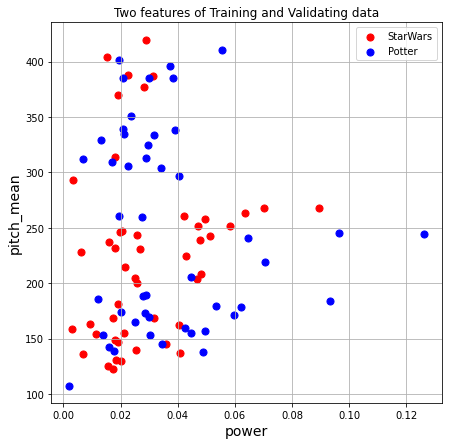

In [ ]:
#vasualize the first two features for experiment data
X_new = X_o[:,0:2]


import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_new[y_o==0,0], X_new[y_o==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_new[y_o==1,0], X_new[y_o==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training and Validating data")
plt.xlabel('power', fontsize=14)
plt.ylabel('pitch_mean', fontsize=14)
plt.grid(True)
plt.show()

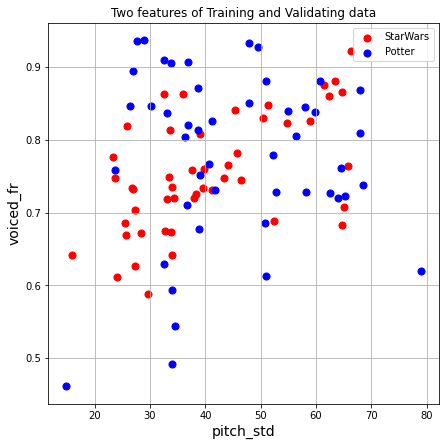

In [ ]:
#visualize the last two features for experiment data
X_new = X_o[:,2:4]

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_new[y_o==0,0], X_new[y_o==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_new[y_o==1,0], X_new[y_o==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training and Validating data")
plt.xlabel('pitch_std', fontsize=14)
plt.ylabel('voiced_fr', fontsize=14)
plt.grid(True)
plt.show()

Text(0.5, 0.92, 'Training and Validating data (voice_fr is shown as the size of the data points)')

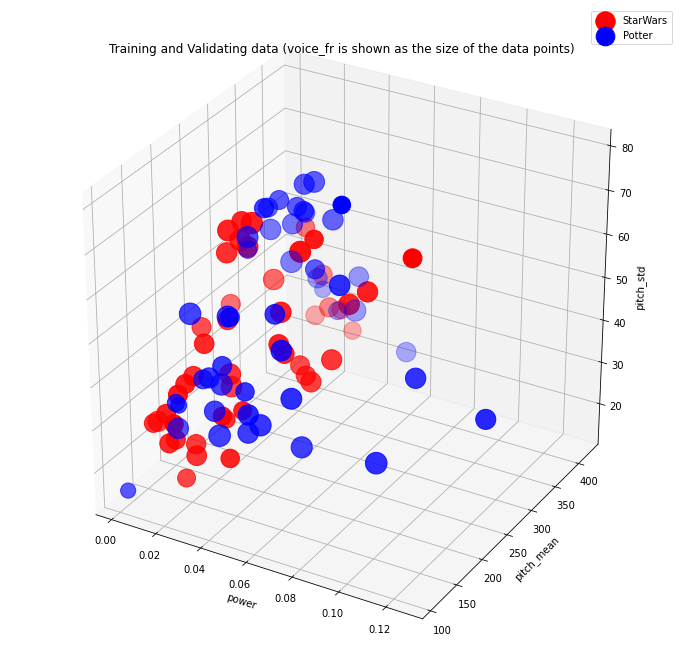

In [ ]:
#check again on the plot 
#visualize the four features - first three in a 3d scatter plot and the last feature is displayed as the size of the points
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d') # initialise 3D plot

ax.scatter(X_o[y_o==0,0], X_o[y_o==0,1], X_o[y_o==0,2], c = 'red',s=X_o[y_o==0,3]*500)
ax.scatter(X_o[y_o==1,0], X_o[y_o==1,1], X_o[y_o==1,2], c = 'blue',s=X_o[y_o==1,3]*500)
ax.set_xlabel('power')
ax.set_ylabel('pitch_mean')
ax.set_zlabel('pitch_std')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Training and Validating data (voice_fr is shown as the size of the data points)")
#ax.set_xlim(-2,2)
#ax.set_zlim(-2,1)

#Experiment : Modelling with experiment data with 4 features [power, pitch_mean, pitch_std, voiced_fr]

split the train and test data and have an explore of the data visually

In [ ]:
#split the train and test dataset in 7:3 ratio
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_o,y_o,test_size=0.3,random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((66, 4), (29, 4), (66,), (29,))

In [ ]:
#check the distribution of two songs for training data
print(' The number of Potter recordings is ', np.count_nonzero(y_train))
print(' The number of StarWars recordings is ', y_train.size - np.count_nonzero(y_train))

 The number of Potter recordings is  29
 The number of StarWars recordings is  37


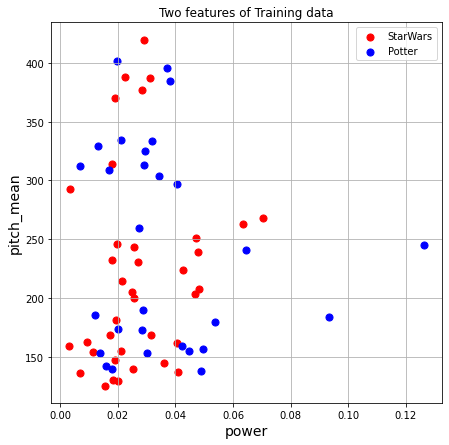

In [ ]:
#visual the first two features of train data
X_train_new = X_train[:,0:2]

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_train_new[y_train==0,0], X_train_new[y_train==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_train_new[y_train==1,0], X_train_new[y_train==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training data")
plt.xlabel('power', fontsize=14)
plt.ylabel('pitch_mean', fontsize=14)
plt.grid(True)
plt.show()

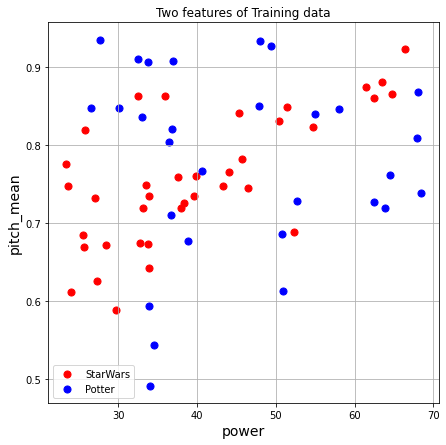

In [ ]:
#visual the last two features of train data
X_train_new = X_train[:,2:4]
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
scatter = plt.scatter(X_train_new[y_train==0,0], X_train_new[y_train==0,1], s=50 , color= 'red')
scatter = plt.scatter(X_train_new[y_train==1,0], X_train_new[y_train==1,1], s=50 , color= 'blue')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Two features of Training data")
plt.xlabel('power', fontsize=14)
plt.ylabel('pitch_mean', fontsize=14)
plt.grid(True)
plt.show()

1. SVM model - fit and predict the data

In [ ]:
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)


precision, recall, _, _ = precision_recall_fscore_support(y_val, yv_p)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))
df = pd.DataFrame.from_records(confusion_matrix(y_val, yv_p))
print('Confusion matrix:')
display(df)
print('f1-score:')
display(2*precision*recall/(precision+recall))

Training Accuracy 0.5909090909090909
Validation  Accuracy 0.5517241379310345
The support vectors are (58, 4)
Precision for each class: [0.45454545 0.85714286].
Recall for each class: [0.90909091 0.33333333].

Confusion matrix:


,0,1
0,10,1
1,12,6


f1-score:


array([0.60606061, 0.48      ])

In [ ]:
# now try to normalise data by z-score method
#data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nor = scaler.fit_transform(X_train)


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train_nor)
yv_p = model.predict(X_val)


print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5606060606060606
Validation  Accuracy 0.5517241379310345
The support vectors are (58, 4)


2. Try to do PCA to 2pc to see the plot


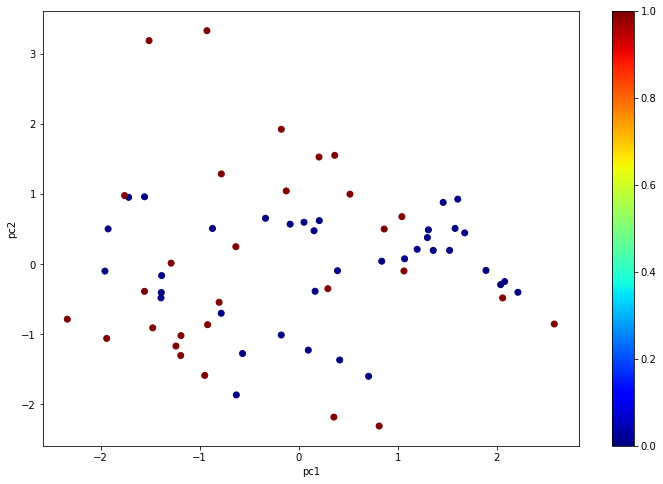

In [ ]:
from sklearn.decomposition import PCA
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(X_train_nor)
projected = pca.transform(X_train_nor)
projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
p = plt.scatter(x=projected['pc1'], y=projected['pc2'], c=y_train,cmap='jet')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar(p)


plt.show()

3. KNN model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 1 is  1.0
The validation accuracy for k= 1 is  0.5517241379310345
Precision for each class: [0.42857143 0.66666667].
Recall for each class: [0.54545455 0.55555556].

Confusion matrix:


,0,1
0,6,5
1,8,10


f1-score:


array([0.48      , 0.60606061])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 2 is  0.8484848484848485
The validation accuracy for k= 2 is  0.5172413793103449
Precision for each class: [0.43478261 0.83333333].
Recall for each class: [0.90909091 0.27777778].

Confusion matrix:


,0,1
0,10,1
1,13,5


f1-score:


array([0.58823529, 0.41666667])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 3 is  0.8484848484848485
The validation accuracy for k= 3 is  0.6896551724137931
Precision for each class: [0.5625     0.84615385].
Recall for each class: [0.81818182 0.61111111].

Confusion matrix:


,0,1
0,9,2
1,7,11


f1-score:


array([0.66666667, 0.70967742])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 4 is  0.8333333333333334
The validation accuracy for k= 4 is  0.6206896551724138
Precision for each class: [0.5 1. ].
Recall for each class: [1.         0.38888889].

Confusion matrix:


,0,1
0,11,0
1,11,7


f1-score:


array([0.66666667, 0.56      ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 5 is  0.8181818181818182
The validation accuracy for k= 5 is  0.6551724137931034
Precision for each class: [0.52631579 0.9       ].
Recall for each class: [0.90909091 0.5       ].

Confusion matrix:


,0,1
0,10,1
1,9,9


f1-score:


array([0.66666667, 0.64285714])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 6 is  0.7121212121212122
The validation accuracy for k= 6 is  0.5517241379310345
Precision for each class: [0.45833333 1.        ].
Recall for each class: [1.         0.27777778].

Confusion matrix:


,0,1
0,11,0
1,13,5


f1-score:


array([0.62857143, 0.43478261])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 7 is  0.696969696969697
The validation accuracy for k= 7 is  0.6206896551724138
Precision for each class: [0.5 1. ].
Recall for each class: [1.         0.38888889].

Confusion matrix:


,0,1
0,11,0
1,11,7


f1-score:


array([0.66666667, 0.56      ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 8 is  0.6818181818181818
The validation accuracy for k= 8 is  0.5517241379310345
Precision for each class: [0.45833333 1.        ].
Recall for each class: [1.         0.27777778].

Confusion matrix:


,0,1
0,11,0
1,13,5


f1-score:


array([0.62857143, 0.43478261])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 9 is  0.7121212121212122
The validation accuracy for k= 9 is  0.6206896551724138
Precision for each class: [0.5 1. ].
Recall for each class: [1.         0.38888889].

Confusion matrix:


,0,1
0,11,0
1,11,7


f1-score:


array([0.66666667, 0.56      ])

<IPython.core.display.Javascript object>

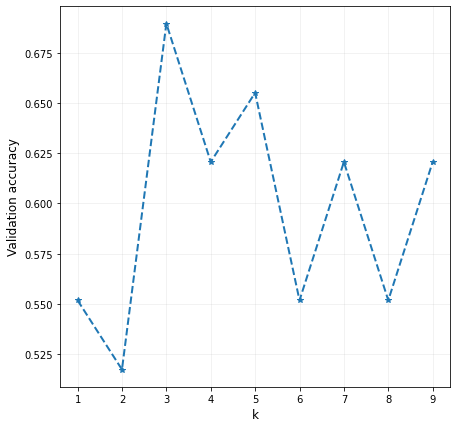

In [ ]:
#knn experiment k from 1 to 10 to find the best k
from google.colab import widgets
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

k_values = range(1,10,1)
tb = widgets.TabBar([str(k) for k in k_values])
accuracy_t = dict.fromkeys(k_values)
accuracy_v = dict.fromkeys(k_values)
for k in k_values:
  with tb.output_to(str(k), select= (k < 2)):
    # First we create the kNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Finally we calculate the validation accuracy
    y_val_pred = knn.predict(X_val)
    accuracy_v[k] = np.sum(y_val==y_val_pred)/len(y_val)

    # Training accuracy
    y_train_pred = knn.predict(X_train)
    accuracy_t[k] = np.sum(y_train==y_train_pred)/len(y_train)

    print("The training accuracy for k=", k, "is ", accuracy_t[k])
    print("The validation accuracy for k=", k, "is ", accuracy_v[k])
    


    precision, recall, _, _ = precision_recall_fscore_support(y_val, y_val_pred)
    print('Precision for each class: {0}.'.format(precision))
    print('Recall for each class: {0}.\n'.format(recall))

    df = pd.DataFrame.from_records(confusion_matrix(y_val, y_val_pred))
    print('Confusion matrix:')
    display(df)
    print('f1-score:')
    display(2*precision*recall/(precision+recall))

# Here we predict the value of the validation accuracy as a function of k
plt.figure(figsize=(7, 7))
plt.plot(k_values, list(accuracy_v.values()), '--*', linewidth=2)
plt.xlabel("k", fontsize=12)
plt.ylabel("Validation accuracy", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
#knn for k=3
from sklearn import neighbors
k = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Finally we calculate the validation accuracy
y_val_pred = knn.predict(X_val)
accuracy_v = np.sum(y_val==y_val_pred)/len(y_val)

# Training accuracy
y_train_pred = knn.predict(X_train)
accuracy_t = np.sum(y_train==y_train_pred)/len(y_train)

print("The training accuracy for k=", k, "is ", accuracy_t)
print("The validation accuracy for k=", k, "is ", accuracy_v)

The training accuracy for k= 3 is  0.8484848484848485
The validation accuracy for k= 3 is  0.6896551724137931


In [ ]:
#cross valiation

knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import cross_validate

# Note that the data was already implicitly shuffled by train_test_split
result_3 = cross_validate(knn_3, X_train, y_train, cv=5)
print('Average accuracy across folds (k = 3): {0}.'.format(result_3['test_score'].mean()))
      
knn_3.fit(X_train, y_train)
print('Test dataset accuracy (k = 3): {0}.'.format(knn_3.score(X_val, y_val)))

Average accuracy across folds (k = 3): 0.6934065934065934.
Test dataset accuracy (k = 3): 0.6896551724137931.


4. Logistic Regression model

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression

# Here we fit our logistic regression classfier to the training dataset 
log_reg_classifier = LogisticRegression(C=1, solver='liblinear', multi_class='auto')
log_reg_classifier.fit(X_train, y_train)
y_val_pred = log_reg_classifier.predict(X_val)

print('Training accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(X_train, y_train)))
print('Validation accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(X_val, y_val)))

precision, recall, _, _ = precision_recall_fscore_support(y_val, y_val_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_val_pred))
print('Confusion matrix:')
display(df)
print('f1-score:')
display(2*precision*recall/(precision+recall))

Training accuracy of the logistic classifier: 0.6060606060606061
Validation accuracy of the logistic classifier: 0.4482758620689655
Precision for each class: [0.36842105 0.6       ].
Recall for each class: [0.63636364 0.33333333].

Confusion matrix:


,0,1
0,7,4
1,12,6


f1-score:


array([0.46666667, 0.42857143])

In [ ]:
#transform into degree of 3 polynomial features, then apply for logistic regression classifier
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
polyX_train = poly.fit_transform(X_train)
polyX_val = poly.fit_transform(X_val)

# Here we fit our logistic regression classfier to the training dataset 
log_reg_classifier = LogisticRegression(C=0.1, solver='liblinear', multi_class='auto')
log_reg_classifier.fit(polyX_train, y_train)
y_val_pred = log_reg_classifier.predict(polyX_val)
print('Training accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(polyX_train, y_train)))
print('Validation accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(polyX_val, y_val)))
precision, recall, _, _ = precision_recall_fscore_support(y_val, y_val_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_val_pred))
print('Confusion matrix:')
display(df)
print('f1-score:')
display(2*precision*recall/(precision+recall))

Training accuracy of the logistic classifier: 0.7727272727272727
Validation accuracy of the logistic classifier: 0.5862068965517241
Precision for each class: [0.46666667 0.71428571].
Recall for each class: [0.63636364 0.55555556].

Confusion matrix:


,0,1
0,7,4
1,8,10


f1-score:


array([0.53846154, 0.625     ])

5. NB model

In [ ]:
#nb model
from sklearn.naive_bayes import GaussianNB
gnb_A = GaussianNB(priors=np.array([1/2,1/2]))
gnb_A.fit(X_train, y_train)
y_val_pred = gnb_A.predict(X_val)

print('Training accuracy : {}'.format(gnb_A.score(X_train, y_train)))
print('Validation accuracy : {}'.format(gnb_A.score(X_val, y_val)))
precision, recall, _, _ = precision_recall_fscore_support(y_val, y_val_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_val_pred))
print('Confusion matrix:')
display(df)
print('f1-score:')
display(2*precision*recall/(precision+recall))

Training accuracy : 0.7272727272727273
Validation accuracy : 0.6206896551724138
Precision for each class: [0.5        0.73333333].
Recall for each class: [0.63636364 0.61111111].

Confusion matrix:


,0,1
0,7,4
1,7,11


f1-score:


array([0.56      , 0.66666667])

6. Random Forest model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [50, 100, 200,300,400], 'max_features': [0.1, 0.25,0.5,0.75]}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, parameters, cv=5)
rfc_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(rfc_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(rfc_cv.score(X_val, y_val)))

Best hyperparameter setting: RandomForestClassifier(max_features=0.25, n_estimators=200).
Average accuracy across folds of best hyperparameter setting: 0.6956043956043956.
Test dataset accuracy of best hyperparameter setting: 0.5862068965517241.


In [ ]:
#random forest 


rfc = RandomForestClassifier(n_estimators=200, random_state=0,max_features=0.25)
rfc.fit(X_train, y_train)
y_val_pred = rfc.predict(X_val)
print(rfc.score(X_train, y_train))

print('Test dataset accuracy (random forest classifier): {0}.'.format(rfc.score(X_val, y_val)))

precision, recall, _, _ = precision_recall_fscore_support(y_val, y_val_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_val_pred))
print('Confusion matrix:')
display(df)
print('f1-score:')
display(2*precision*recall/(precision+recall))

1.0
Test dataset accuracy (random forest classifier): 0.6206896551724138.
Precision for each class: [0.5        0.81818182].
Recall for each class: [0.81818182 0.5       ].

Confusion matrix:


,0,1
0,9,2
1,9,9


f1-score:


array([0.62068966, 0.62068966])

#Final test of the model


Text(0.5, 0.92, 'Training and Validating data (voice_fr is shown as the size of the data points)')

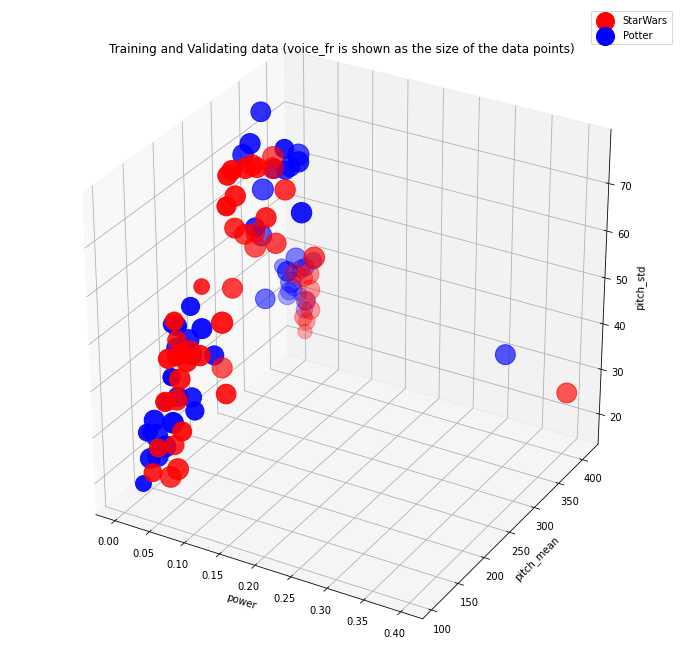

In [ ]:
#check again on the plot 
#visualize the four features - first three in a 3d scatter plot and the last feature is displayed as the size of the points
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d') # initialise 3D plot

ax.scatter(X_test[y_test==0,0], X_test[y_test==0,1], X_test[y_test==0,2], c = 'red',s=X_test[y_test==0,3]*500)
ax.scatter(X_test[y_test==1,0], X_test[y_test==1,1], X_test[y_test==1,2], c = 'blue',s=X_test[y_test==1,3]*500)
ax.set_xlabel('power')
ax.set_ylabel('pitch_mean')
ax.set_zlabel('pitch_std')
plt.legend(labels=["StarWars", "Potter"])
plt.title("Training and Validating data (voice_fr is shown as the size of the data points)")
#ax.set_xlim(-2,2)
#ax.set_zlim(-2,1)

outlier removal

In [ ]:
#put X features in a dataframe
X_test_table = [] 

for i in range(100):

  power = X_test[i,0]
  pitch_mean=X_test[i,1]
  pitch_std = X_test[i,2]
  voiced_fr = X_test[i,3]
  X_test_table.append([power,pitch_mean,pitch_std, voiced_fr])
  

X_test_table[0:5]
X_test_df = pd.DataFrame(X_test_table,columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr']) 
X_test_df.head()

,power,pitch_mean,pitch_std,voiced_fr
0,0.030173,395.356974,31.840505,0.709863
1,0.025086,326.012057,38.656043,0.771075
2,0.013050,335.495643,51.171319,0.871616
3,0.036522,330.650991,66.828406,0.725275
4,0.019412,331.467070,61.738458,0.882398


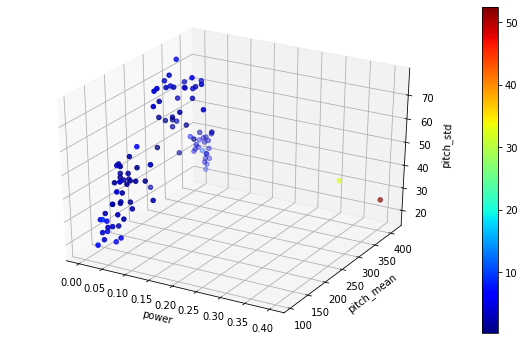

In [ ]:
# Compute Mahalanobis distance for delta dataset
mahal = mahalanobis(x=X_test_df, data=X_test_df[['power', 'pitch_mean', 'pitch_std', 'voiced_fr']])

# Assign an outlier score for the data based on the computed Mahalanobis distance
outlier_score = mahal

# Display 3D scatterplot with datapoints having a different color according to their outlier score
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_test_df.power,X_test_df.pitch_mean,X_test_df.pitch_std,c=outlier_score,cmap='jet')
ax.set_xlabel('power')
ax.set_ylabel('pitch_mean')
ax.set_zlabel('pitch_std')
#ax.set_zlim(-2,50)
fig.colorbar(p)
plt.show()

In [ ]:
outlier = pd.DataFrame(outlier_score, index=X_exp_df.index, columns=['Outlier score'])
result = pd.concat((X_test_df,outlier), axis=1)
result.nlargest(5,'Outlier score')

,power,pitch_mean,pitch_std,voiced_fr,Outlier score
81,0.400333,406.165577,26.201293,0.793076,52.536891
32,0.322912,391.308011,32.758308,0.796520,32.447380
46,0.013289,406.224778,31.519214,0.354051,10.706964
64,0.018507,408.643019,22.999613,0.407774,9.328193
11,0.014112,131.141802,28.263445,0.426579,9.292655


In [ ]:
#check the top two rows of the largest outliers
display(X_test[81])
display(X_test[64])
display(X_test[46])
display(X_test[32])
display(X_test[11])

array([4.00332906e-01, 4.06165577e+02, 2.62012929e+01, 7.93076318e-01])

array([1.85070096e-02, 4.08643019e+02, 2.29996126e+01, 4.07774390e-01])

array([1.32887180e-02, 4.06224778e+02, 3.15192143e+01, 3.54051054e-01])

array([3.22912293e-01, 3.91308011e+02, 3.27583082e+01, 7.96520424e-01])

array([1.41121427e-02, 1.31141802e+02, 2.82634451e+01, 4.26578845e-01])

In [ ]:

#remove these two outliers
X_test_o = np.delete(X_test, 81, 0)
y_test_o = np.delete(y_test, 81, 0)
X_test_o = np.delete(X_test_o, 64, 0)
y_test_o = np.delete(y_test_o, 64, 0)
X_test_o = np.delete(X_test_o, 46, 0)
y_test_o = np.delete(y_test_o, 46, 0)
X_test_o = np.delete(X_test_o, 32, 0)
y_test_o = np.delete(y_test_o, 32, 0)
X_test_o = np.delete(X_test_o, 11, 0)
y_test_o = np.delete(y_test_o, 11, 0)

In [ ]:
# check the shape of test data
print('The shape of X is', X_test_o.shape) 
print('The shape of y is', y_test_o.shape)
print('The labels vector is', y_test_o)

The shape of X is (95, 4)
The shape of y is (95,)
The labels vector is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


In [ ]:
#check the distribution of each song for the test data
print(' The number of Potter recordings is ', np.count_nonzero(y_test_o))
print(' The number of StarWars recordings is ', y_test_o.size - np.count_nonzero(y_test_o))

 The number of Potter recordings is  47
 The number of StarWars recordings is  48


#Final prediction of the test data

In [ ]:
#knn for k=3
from sklearn import neighbors
k = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Finally we calculate the test accuracy
y_test_pred = knn.predict(X_test_o)
accuracy_v = np.sum(y_test_o==y_test_pred)/len(y_test_o)

# Training accuracy
y_train_pred = knn.predict(X_train)
accuracy_t = np.sum(y_train==y_train_pred)/len(y_train)

print("The training accuracy for k=", k, "is ", accuracy_t)
print("The test accuracy for k=", k, "is ", accuracy_v)

precision, recall, _, _ = precision_recall_fscore_support(y_test_o, y_test_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))
df = pd.DataFrame.from_records(confusion_matrix(y_test_o, y_test_pred))
print('Confusion matrix:')
display(df)
print('f1-score:')
display(2*precision*recall/(precision+recall))

The training accuracy for k= 3 is  0.8484848484848485
The test accuracy for k= 3 is  0.5052631578947369
Precision for each class: [0.51282051 0.5       ].
Recall for each class: [0.41666667 0.59574468].

Confusion matrix:


,0,1
0,20,28
1,19,28


f1-score:


array([0.45977011, 0.54368932])